In [9]:
# -*- coding: utf-8 -*-

from __future__ import division, unicode_literals, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import dateutil
import datetime

import pickle

from sklearn import cross_validation, datasets, linear_model, grid_search, metrics, ensemble, tree
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
import statsmodels.api as sm

sns.set_style("whitegrid", {'axes.grid' : False})

## Load Pickle Point

In [10]:
movies = pd.read_pickle('data/movies.pkl')

In [11]:
movies.iloc[:,5:15]

imdb_votes  metascore  \
title                                imdb_id                            
Star Wars: The Force Awakens         tt2488496      575439  81.000000   
Inside Out                           tt2096673      352037  94.000000   
Minions                              tt2293640      144106  56.000000   
The Martian                          tt3659388      483695  80.000000   
Straight Outta Compton               tt1398426      122209  72.000000   
San Andreas                          tt2126355      149574  43.000000   
Kingsman: The Secret Service         tt2802144      402158  58.000000   
Get Hard                             tt2561572       87021  34.000000   
Pixels                               tt2120120       90787  27.000000   
Bridge of Spies                      tt3682448      182754  81.000000   
The Big Short                        tt1596363      197727  81.000000   
Joy                                  tt2446980       77752  56.000000   
Fantastic Four                       tt0120667      269285  40.000000   
Southpaw                             tt1798684      150040  57.000000   
Sicario                              tt3397884      202155  81.000000   
Pan                                  tt3332064       42124  36.000000   
Woman in Gold                        tt2404425       34507  51.000000   
Paper Towns                          tt3622592       64959  56.000000   
Run All Night                        tt2199571       77474  59.000000   
Ex Machina                           tt0470752      298392  78.000000   
Still Alice                          tt3316960       88115  72.000000   
Steve Jobs                           tt2080374       96627  82.000000   
Dope                                 tt3850214       58812  72.000000   
American Ultra                       tt3316948       55567  50.000000   
The Gunman                           tt2515034       28713  39.000000   
Mortdecai                            tt3045616       48250  27.000000   
The Green Inferno                    tt2403021       22179  38.000000   
Me and Earl and the Dying Girl       tt2582496       79079  74.000000   
Maleficent                           tt1587310      253606  56.000000   
22 Jump Street                       tt2294449      260969  71.000000   
...                                                    ...        ...   
Robin Hood: Prince of Thieves        tt0102798      146307  62.703448   
Beauty and the Beast                 tt0101414      310421  62.703448   
The Silence of the Lambs             tt0102926      893541  84.000000   
Hook                                 tt0102057      183802  52.000000   
The Addams Family                    tt0101272       97136  62.703448   
My Girl                              tt0102492       56178  62.703448   
The Rocketeer                        tt0102803       43990  62.000000   
Freddy's Dead: The Final Nightmare   tt0101917       30743  62.703448   
Hudson Hawk                          tt0102070       43570  17.000000   
Ghost                                tt0099653      154968  52.000000   
Total Recall                         tt0100802      241337  57.000000   
Back to the Future Part III          tt0099088      285476  55.000000   
The Bonfire of the Vanities          tt0099165       17694  62.703448   
Batman                               tt0096895      271082  69.000000   
Indiana Jones and the Last Crusade   tt0097576      518949  65.000000   
Back to the Future Part II           tt0096874      342305  57.000000   
Who Framed Roger Rabbit              tt0096438      141296  83.000000   
Twins                                tt0096320       88024  53.000000   
Die Hard                             tt0095016      599179  70.000000   
Predator                             tt0093773      292245  36.000000   
Full Metal Jacket                    tt0093058      488594  78.000000   
Superman IV: The Quest for Peace     tt0094074       33789  22.000000   
A Room with a View               

In [12]:
movies.columns

Index([  u'domestic_total_gross',                u'runtime',
                 u'release_date',      u'production_budget',
                  u'imdb_rating',             u'imdb_votes',
                    u'metascore',           u'tomato_meter',
                u'tomato_rating',         u'tomato_reviews',
            u'tomato_user_meter',     u'tomato_user_rating',
          u'tomato_user_reviews',                   u'year',
                  u'total_lines',                  u'ratio',
                      u'bechdel',                   u'wins',
                  u'nominations',   u'writer_genderization',
         u'actors_genderization', u'director_genderization',
                  u'country_usa',       u'language_english',
                u'genre_mystery',          u'genre_romance',
                  u'genre_sport',           u'genre_sci-fi',
                 u'genre_family',           u'genre_horror',
               u'genre_thriller',            u'genre_crime',
                  u'genr

In [13]:
# Dropping time-related variables and creating awards column (wins + nominations)
movies.drop(['year', 'release_date'], axis=1, inplace=True)
movies['awards'] = movies['wins'] + movies['nominations']
movies['roi'] = movies['domestic_total_gross'] * 1.0 / movies['production_budget'] * 1.0

In [14]:
movies.head()

domestic_total_gross  runtime  \
title                        imdb_id                                    
Star Wars: The Force Awakens tt2488496           936662225.0    136.0   
Inside Out                   tt2096673           356461711.0     94.0   
Minions                      tt2293640           336045770.0     91.0   
The Martian                  tt3659388           228433663.0    141.0   
Straight Outta Compton       tt1398426           161197785.0    147.0   

                                        production_budget  imdb_rating  \
title                        imdb_id                                     
Star Wars: The Force Awakens tt2488496        245000000.0          8.2   
Inside Out                   tt2096673        175000000.0          8.3   
Minions                      tt2293640         74000000.0          6.4   
The Martian                  tt3659388        108000000.0          8.0   
Straight Outta Compton       tt1398426         28000000.0          7.9   

                                        imdb_votes  metascore  tomato_meter  \
title                        imdb_id                                          
Star Wars: The Force Awakens tt2488496      575439       81.0          92.0   
Inside Out                   tt2096673      352037       94.0          98.0   
Minions                      tt2293640      144106       56.0          56.0   
The Martian                  tt3659388      483695       80.0          92.0   
Straight Outta Compton       tt1398426      122209       72.0          87.0   

                                        tomato_rating  tomato_reviews  \
title                        imdb_id                                    
Star Wars: The Force Awakens tt2488496            8.2           360.0   
Inside Out                   tt2096673            8.9           317.0   
Minions                      tt2293640            5.8           196.0   
The Martian                  tt3659388            7.8           311.0   
Straight Outta Compton       tt1398426            7.3           210.0   

                                        tomato_user_meter    ...     \
title                        imdb_id                         ...      
Star Wars: The Force Awakens tt2488496               89.0    ...      
Inside Out                   tt2096673               89.0    ...      
Minions                      tt2293640               49.0    ...      
The Martian                  tt3659388               91.0    ...      
Straight Outta Compton       tt1398426               92.0    ...      

                                        genre_biography  genre_history  \
title                        imdb_id                                     
Star Wars: The Force Awakens tt2488496                0              0   
Inside Out                   tt2096673                0              0   
Minions                      tt2293640                0              0   
The Martian                  tt3659388                0              0   
Straight Outta Compton       tt1398426                1              0   

                                        mpaa_G  mpaa_NC-17  mpaa_PG  \
title                        imdb_id                                  
Star Wars: The Force Awakens tt2488496     0.0         0.0      0.0   
Inside Out                   tt2096673     0.0         0.0      1.0   
Minions                      tt2293640     0.0         0.0      1.0   
The Martian                  tt3659388     0.0         0.0      0.0   
Straight Outta Compton       tt1398426     0.0         0.0      0.0   

                                        mpaa_PG-13  mpaa_R  mpaa_Unrated  \
title                        imdb_id                                       
Star Wars: The Force Awakens tt2488496         1.0     0.0           0.0   
Inside Out                   tt2096673         0.0     0.0           0.0   
Minions                      tt2293640         0.0     0.0           0.0   
The Martian                  tt3659388         1

In [15]:
# sns.pairplot(movies_just_future)
print(list(movies.columns))

[u'domestic_total_gross', u'runtime', u'production_budget', 'imdb_rating', 'imdb_votes', 'metascore', 'tomato_meter', 'tomato_rating', 'tomato_reviews', 'tomato_user_meter', 'tomato_user_rating', 'tomato_user_reviews', u'total_lines', u'ratio', u'bechdel', u'wins', u'nominations', u'writer_genderization', u'actors_genderization', u'director_genderization', u'country_usa', u'language_english', u'genre_mystery', u'genre_romance', u'genre_sport', u'genre_sci-fi', u'genre_family', u'genre_horror', u'genre_thriller', u'genre_crime', u'genre_drama', u'genre_fantasy', u'genre_war', u'genre_animation', u'genre_music', u'genre_adventure', u'genre_action', u'genre_western', u'genre_comedy', u'genre_musical', u'genre_biography', u'genre_history', u'mpaa_G', u'mpaa_NC-17', u'mpaa_PG', u'mpaa_PG-13', u'mpaa_R', u'mpaa_Unrated', u'awards', u'roi']


In [16]:
# all genres
genre_list = [u'genre_mystery', u'genre_romance', u'genre_sport', u'genre_sci-fi', u'genre_family', u'genre_horror', u'genre_thriller', u'genre_crime', u'genre_drama', u'genre_fantasy', u'genre_war', u'genre_animation', u'genre_music', u'genre_adventure', u'genre_action', u'genre_western', u'genre_comedy', u'genre_musical', u'genre_biography', u'genre_history']
# excluding sport, war, western, music, musical 
genre_list_excl = [u'genre_mystery', u'genre_romance', u'genre_sci-fi', u'genre_family', u'genre_horror', u'genre_thriller', u'genre_crime', u'genre_drama', u'genre_fantasy', u'genre_animation', u'genre_adventure', u'genre_action', u'genre_comedy', u'genre_biography', u'genre_history']
# drop 
genre_list_drop = [u'genre_sport', u'genre_war', u'genre_music', u'genre_western', u'genre_musical']

# all mpaa
mpaa_list = [u'mpaa_G', u'mpaa_NC-17', u'mpaa_PG', u'mpaa_PG-13', u'mpaa_R', u'mpaa_Unrated']
# excluding NC-17, Unrated and G
mpaa_list_excl = [u'mpaa_PG', u'mpaa_PG-13', u'mpaa_R']
# drop
mpaa_list_drop = [u'mpaa_G', u'mpaa_NC-17', u'mpaa_Unrated']

# excluding all variables that are highly correlated with box office - can be additional targets
movie_future = ['imdb_rating', 'imdb_votes', 'metascore', 'tomato_meter', 'tomato_rating', 'tomato_reviews', 'tomato_user_meter',
                'tomato_user_rating', 'tomato_user_reviews', 'domestic_total_gross', 'wins', 'nominations', 'awards', 'roi']

movie_future_drop = ['imdb_rating', 'imdb_votes', 'metascore', 'tomato_rating', 'tomato_reviews', 'tomato_user_meter',
                'tomato_user_rating', 'tomato_user_reviews', 'wins', 'nominations']

movie_targets = ['tomato_meter', 'domestic_total_gross', 'awards', 'roi']

# foreign
foreign_drop = ['language_english', 'country_usa']

## StatsModel - OLS

In [28]:
def run_statsmodel(df, target, gender=False, filt=None, stat='full'):
    
    if filt:
        df = df[df[filt] == 1]
        df = df.drop([filt], axis=1)
    
    if gender:
        df_gender = df.loc[:,['total_lines', 'ratio', 'bechdel', 'writer_genderization', 'actors_genderization',
                      'director_genderization']]
        X,y = df_gender, df[target]
    if target == 'roi':
        X = df.drop(movie_future + genre_list_drop + mpaa_list_drop + ['language_english', 'production_budget'], axis = 1)
        y = df[target]
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
    else:
        X = df.drop(movie_future + genre_list_drop + mpaa_list_drop + ['language_english'], axis = 1)
        y = df[target]
        # X,y = df.drop(movie_future, axis=1), df[target]
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

    X = sm.add_constant(X)
    
    sm_model = sm.OLS(y_train,X_train)
    results = sm_model.fit()
    
    if 'rsquared' in stat:
        return results.rsquared
    else:
        return results.summary()

In [18]:
def loop_categories(df, target, category_list, gender=False):
    for category in category_list:
        find = run_statsmodel(df, target, gender, category, 'rsquared')
        size = df.loc[:,category].sum()
        print(category, 'size:', size, 'rsquared:', find)

In [19]:
loop_categories(movies, 'roi', genre_list_excl, False)

genre_mystery size: 77 rsquared: 0.339034641038
genre_romance size: 100 rsquared: 0.609839961475
genre_sci-fi size: 91 rsquared: 0.469126949374
genre_family size: 36 rsquared: 0.71489600838
genre_horror size: 65 rsquared: 0.530592560288
genre_thriller size: 123 rsquared: 0.319401946111
genre_crime size: 122 rsquared: 0.322547041093
genre_drama size: 332 rsquared: 0.601828226397
genre_fantasy size: 74 rsquared: 0.645156375756
genre_animation size: 44 rsquared: 0.500240677931
genre_adventure size: 178 rsquared: 0.70915397895
genre_action size: 207 rsquared: 0.304171733772
genre_comedy size: 210 rsquared: 0.673571153791
genre_biography size: 46 rsquared: 0.410302629907
genre_history size: 23 rsquared: 0.68130375886


In [21]:
loop_categories(movies, 'domestic_total_gross', genre_list_excl, False)

genre_mystery size: 77 rsquared: 0.523431381269
genre_romance size: 100 rsquared: 0.813033136607
genre_sci-fi size: 91 rsquared: 0.764022237111
genre_family size: 36 rsquared: 0.882135902613
genre_horror size: 65 rsquared: 0.845875567746
genre_thriller size: 123 rsquared: 0.562039891744
genre_crime size: 122 rsquared: 0.680029407854
genre_drama size: 332 rsquared: 0.686004549377
genre_fantasy size: 74 rsquared: 0.904755104568
genre_animation size: 44 rsquared: 0.671411604068
genre_adventure size: 178 rsquared: 0.815249115988
genre_action size: 207 rsquared: 0.491769795664
genre_comedy size: 210 rsquared: 0.784039909082
genre_biography size: 46 rsquared: 0.542798053848
genre_history size: 23 rsquared: 0.91176875744


In [22]:
loop_categories(movies, 'roi', mpaa_list_excl)

mpaa_PG size: 82.0 rsquared: 0.375688960945
mpaa_PG-13 size: 258.0 rsquared: 0.612516350831
mpaa_R size: 309.0 rsquared: 0.570664460799


In [23]:
loop_categories(movies, 'domestic_total_gross', mpaa_list_excl)

mpaa_PG size: 82.0 rsquared: 0.62170104239
mpaa_PG-13 size: 258.0 rsquared: 0.727871559586
mpaa_R size: 309.0 rsquared: 0.756234490172


In [24]:
run_statsmodel(movies, 'roi') # ['ratio', 'bechdel', 'writer_genderization', 'actors_genderization', 'director_genderization']

0.58697941359086969

In [37]:
run_statsmodel(movies.drop(['ratio', 'bechdel'], axis=1), 'domestic_total_gross')

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.746
Model:                              OLS   Adj. R-squared:                  0.731
Method:                   Least Squares   F-statistic:                     51.45
Date:                  Fri, 07 Oct 2016   Prob (F-statistic):          1.33e-113
Time:                          08:57:35   Log-Likelihood:                -8996.6
No. Observations:                   463   AIC:                         1.804e+04
Df Residuals:                       438   BIC:                         1.815e+04
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
runtime                 8.706e+05   1.78e+05      4.882      0.000       5.2e+05  1.22e+06
production_budget          0.8925      0.095      9.377      0.000         0.705     1.080
total_lines               77.6021    551.134      0.141      0.888     -1005.594  1160.799
writer_genderization    1.706e+07   1.81e+07      0.940      0.348     -1.86e+07  5.27e+07
actors_genderization   -9.041e+06   1.69e+07     -0.534      0.594     -4.23e+07  2.43e+07
director_genderization -4.577e+06    1.9e+07     -0.241      0.810     -4.19e+07  3.27e+07
country_usa            -1.062e+06   1.74e+07     -0.061      0.951     -3.53e+07  3.32e+07
genre_mystery          -1.608e+07   1.12e+07     -1.433      0.153     -3.81e+07  5.97e+06
genre_romance          -3.576e+06    1.1e+07     -0.324      0.746     -2.53e+07  1.81e+07
genre_sci-fi           -1.572e+07   1.09e+07     -1.445      0.149     -3.71e+07  5.65e+06
genre_family           -1.342e+07   1.71e+07     -0.784      0.434     -4.71e+07  2.02e+07
genre_horror           -2.153e+07   1.28e+07     -1.679      0.094     -4.67e+07  3.68e+06
genre_thriller           -1.3e+06   9.83e+06     -0.132      0.895     -2.06e+07   1.8e+07
genre_crime             -1.33e+06   9.74e+06     -0.137      0.891     -2.05e+07  1.78e+07
genre_drama            -2.128e+07   9.12e+06     -2.334      0.020     -3.92e+07 -3.36e+06
genre_fantasy           1.004e+07   1.18e+07      0.849      0.397     -1.32e+07  3.33e+07
genre_animation         4.541e+07    1.6e+07      2.843      0.005       1.4e+07  7.68e+07
genre_adventure         4.871e+06   9.73e+06      0.501      0.617     -1.43e+07   2.4e+07
genre_action           -1.315e+07   9.48e+06     -1.386      0.166     -3.18e+07  5.49e+06
genre_comedy           -6.666e+05   9.51e+06     -0.070      0.944     -1.94e+07   1.8e+07
genre_biography         8.122e+05   1.48e+07      0.055      0.956     -2.82e+07  2.99e+07
genre_history          -5.617e+07   2.16e+07     -2.599      0.010     -9.87e+07 -1.37e+07
mpaa_PG                -2.406e+07   2.22e+07     -1.082      0.280     -6.78e+07  1.96e+07
mpaa_PG-13             -2.118e+07   2.18e+07     -0.970      0.333     -6.41e+07  2.17e+07
mpaa_R                 -5.297e+07   2.23e+07     -2.377      0.018     -9.68e+07 -9.16e+06
==============================================================================
Omnibus:                      106.424   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.485
Skew:                           1.154   Prob(JB):                     7.43e-57
Kurtosis:                       5.842   Cond. No.                     8.76e+08
==============================================================================

Warnings:
[1] Standard Errors assume t

## Sklearn - Additional Models

In [44]:
# Different combinations of models inputs
# X,y = movies.drop(movie_future + ['production_budget'], axis=1),movies['roi']
# X,y = movies.drop(movie_future, axis=1),movies['tomato_meter']
# X,y = movies.drop(movie_future, axis=1),movies['awards']
# X,y = movies_poor.drop(movie_future, axis = 1), movies_poor['domestic_total_gross']

# X,y = movies.drop(movie_future + genre_list_drop + mpaa_list_drop, axis = 1), movies['domestic_total_gross']
# X,y = movies.drop(movie_future + genre_list_drop + mpaa_list_drop + foreign_drop, axis = 1), movies['domestic_total_gross']
# X,y = movies_gender.drop('domestic_total_gross', axis=1), movies_gender['domestic_total_gross']

# X,y = movies.loc[:,['total_lines', 'ratio', 'bechdel', 'writer_genderization', 'actors_genderization',
#                       'director_genderization']], movies['domestic_total_gross']

In [45]:
# kfold = cross_validation.KFold(len(X), n_folds = 5, shuffle = True, random_state = 0)

In [53]:
# Runs all models using X and y inputs, splitting into train and test sets and solving for optimal parameters
def run_models(X, y, X_train, X_test, y_train, y_test):
    lasso = linear_model.Lasso()
    ridge = linear_model.Ridge()
    elasticnet = linear_model.ElasticNet()
    decisiontree = tree.DecisionTreeRegressor()
    extratree = tree.ExtraTreeRegressor()
    randomforest = ensemble.RandomForestRegressor()

    parameters_lin = {'normalize':(True,False),
                  'alpha':np.logspace(-4,-.1,30)}

    parameters_tree = {'min_samples_split': range(10,21), 'max_depth': range(4,12,2)}

    grid_searcher_lasso = grid_search.GridSearchCV(lasso, parameters_lin)
    grid_searcher_lasso.fit(X, y)
    print(grid_searcher_lasso.best_params_)

    grid_searcher_ridge = grid_search.GridSearchCV(ridge, parameters_lin)
    grid_searcher_ridge.fit(X, y)
    print(grid_searcher_ridge.best_params_)

    grid_searcher_elasticnet = grid_search.GridSearchCV(elasticnet, parameters_lin)
    grid_searcher_elasticnet.fit(X, y)
    print(grid_searcher_elasticnet.best_params_)

    grid_searcher_decisiontree = grid_search.GridSearchCV(decisiontree, parameters_tree)
    grid_searcher_decisiontree.fit(X, y)
    print(grid_searcher_decisiontree.best_params_)

    grid_searcher_extratree = grid_search.GridSearchCV(extratree, parameters_tree)
    grid_searcher_extratree.fit(X, y)
    print(grid_searcher_extratree.best_params_)

    grid_searcher_randomforest = grid_search.GridSearchCV(randomforest, parameters_tree)
    grid_searcher_randomforest.fit(X, y)
    print(grid_searcher_randomforest.best_params_)
      
    models = {}
    models['lin_reg'] = linear_model.LinearRegression()
    models['lasso'] = linear_model.Lasso(alpha=grid_searcher_lasso.best_params_['alpha'], 
                                         normalize=grid_searcher_lasso.best_params_['normalize'])
    models['ridge'] = linear_model.Ridge(alpha = grid_searcher_ridge.best_params_['alpha'], 
                                         normalize=grid_searcher_lasso.best_params_['normalize'])
    models['elasticnet'] = linear_model.ElasticNet(alpha = grid_searcher_elasticnet.best_params_['alpha'], 
                                                   normalize=grid_searcher_lasso.best_params_['normalize'])
    models['decisiontree'] = tree.DecisionTreeRegressor(min_samples_split=grid_searcher_decisiontree.best_params_['min_samples_split'],
                                                max_depth=grid_searcher_decisiontree.best_params_['max_depth'])
    models['extratrees'] = tree.ExtraTreeRegressor(min_samples_split=grid_searcher_extratree.best_params_['min_samples_split'],
                                                max_depth=grid_searcher_extratree.best_params_['max_depth'])
    models['randomForest'] = ensemble.RandomForestRegressor(min_samples_split=grid_searcher_randomforest.best_params_['min_samples_split'],
                                                max_depth=grid_searcher_randomforest.best_params_['max_depth'])
    models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
    models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()

    for name,model in models.iteritems():
        model.fit(X_train,y_train)
        print('Model: '+name+", Score: "+str(model.score(X_test,y_test)))
        try:
            sorted_features = sorted(zip(X.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
            for feature in sorted_features:
            # coeff_df = pd.DataFrame(model.coef_,X_test.columns,columns=['Coefficient'])
                print(feature)
 
        except:
            pass
               
        print(' ')
    return models

In [54]:
# Domestic total gross - main analysis
X,y = movies.drop(movie_future, axis=1),movies['domestic_total_gross']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
models = run_models(X, y, X_train, X_test, y_train, y_test)

Model: ridge, Score: 0.494243120212
(u'mpaa_G', 51220081.849392451)
(u'mpaa_NC-17', -33485145.384909552)
(u'genre_animation', 28776417.33854828)
(u'genre_history', -28651323.6079267)
(u'genre_musical', -26528647.927978266)
(u'mpaa_Unrated', -23970063.341382671)
(u'genre_drama', -18736224.176139865)
(u'genre_adventure', 18300516.635987677)
(u'genre_horror', -18066586.215811163)
(u'ratio', -17920325.149462476)
(u'genre_family', -17755415.923949562)
(u'mpaa_R', -16892922.376977317)
(u'writer_genderization', 16553261.998139597)
(u'actors_genderization', -16497661.522017244)
(u'bechdel', 16235193.998331901)
(u'genre_war', -16217432.746087147)
(u'genre_fantasy', 15665773.070188476)
(u'genre_music', -13270381.638532368)
(u'country_usa', 11238381.780609643)
(u'mpaa_PG-13', 9839232.9842821229)
(u'genre_mystery', -9428258.9972040411)
(u'mpaa_PG', 8731727.1261267699)
(u'genre_sci-fi', -7830986.8762953859)
(u'director_genderization', 6442641.3297574176)
(u'genre_western', 6358836.270652594)
(u'gen

In [55]:
# Domestic total gross, dropping insignificant variables (representing small sample size)
X,y = movies.drop(movie_future + genre_list_drop + mpaa_list_drop + ['language_english'], axis = 1), movies['domestic_total_gross']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
models = run_models(X, y, X_train, X_test, y_train, y_test)

Model: ridge, Score: 0.370513520058
(u'genre_animation', 41288417.936840326)
(u'country_usa', 32318538.745989565)
(u'genre_history', -25071335.624091852)
(u'writer_genderization', 24281106.66067566)
(u'genre_drama', -21135386.339109693)
(u'genre_fantasy', 18975335.115538839)
(u'mpaa_R', -16587900.781248562)
(u'genre_horror', -15405679.355717124)
(u'genre_adventure', 15107378.47023746)
(u'mpaa_PG-13', 14249348.765486049)
(u'bechdel', 11567861.4577918)
(u'actors_genderization', -11273570.809409693)
(u'director_genderization', -9961371.9313954543)
(u'genre_mystery', -9659690.0525298547)
(u'genre_family', -9228311.0983956382)
(u'genre_sci-fi', -7745584.7155430801)
(u'ratio', -4885664.9268698385)
(u'genre_thriller', -4107110.5456305123)
(u'genre_comedy', 3168616.103045864)
(u'genre_action', -2124745.9458002597)
(u'genre_romance', -1606315.3513772034)
(u'mpaa_PG', -1111400.9320230987)
(u'runtime', 805480.75304136449)
(u'genre_biography', -182093.0446119298)
(u'genre_crime', 154801.5921165011

In [94]:
# ROI
X,y = movies.drop(movie_future + ['production_budget'], axis = 1), movies['roi']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
models = run_models(X, y, X_train, X_test, y_train, y_test)

Model: ridge, Score: 0.0327491292499
(u'mpaa_NC-17', -1.0018084749964293)
(u'genre_musical', -0.80508080370482737)
(u'genre_sport', 0.37565080915154037)
(u'genre_family', -0.35993962553986014)
(u'genre_sci-fi', -0.32035978465022913)
(u'mpaa_G', 0.28741619501741311)
(u'country_usa', 0.2714379477059739)
(u'genre_western', 0.26989646908505338)
(u'genre_action', -0.26171302898189325)
(u'genre_war', -0.24527385537306501)
(u'genre_romance', 0.24452154452326869)
(u'genre_horror', -0.20956644111632725)
(u'genre_history', -0.2029590850298133)
(u'genre_mystery', -0.1971953691488588)
(u'genre_adventure', -0.1495589721420906)
(u'genre_drama', -0.12716912743858153)
(u'genre_animation', -0.12687143931455214)
(u'genre_comedy', 0.11375585370139067)
(u'language_english', -0.10568170985821769)
(u'genre_crime', -0.10291200185215281)
(u'mpaa_PG', 0.099726089470792367)
(u'writer_genderization', 0.09861722125041282)
(u'director_genderization', 0.098153221037353605)
(u'ratio', 0.09749704982507934)
(u'bechdel

In [57]:
# ROI, dropping insignificant variables (representing small sample size)
X,y = movies.drop(movie_future + genre_list_drop + mpaa_list_drop + ['production_budget', 'language_english'], axis = 1), movies['roi']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
models = run_models(X, y, X_train, X_test, y_train, y_test)

Model: ridge, Score: 0.0277136670188
(u'genre_family', -0.36744159854179897)
(u'genre_action', -0.32559856503830914)
(u'genre_history', -0.28923676284475713)
(u'genre_sci-fi', -0.26957138877765224)
(u'genre_romance', 0.24414962330434176)
(u'writer_genderization', 0.22708268116554914)
(u'genre_horror', -0.17698244944539795)
(u'genre_mystery', -0.16916453082118774)
(u'country_usa', 0.15862737359298018)
(u'genre_biography', -0.13942669303341285)
(u'director_genderization', -0.12676646990465543)
(u'bechdel', 0.12293931273914502)
(u'genre_drama', -0.1196066721720109)
(u'mpaa_R', -0.10800016113493698)
(u'genre_crime', -0.098506904898154377)
(u'genre_comedy', 0.089937567554287681)
(u'genre_thriller', -0.089312692348474831)
(u'ratio', 0.077409659628732017)
(u'genre_adventure', -0.064530763963473223)
(u'actors_genderization', -0.059419521217274902)
(u'genre_fantasy', -0.050135269286379812)
(u'genre_animation', 0.045876615966662052)
(u'mpaa_PG-13', 0.0357590170529637)
(u'mpaa_PG', 0.017086091546

## Evaluating Linear Model

In [438]:
predictions = models['lin_reg'].predict(X_test)

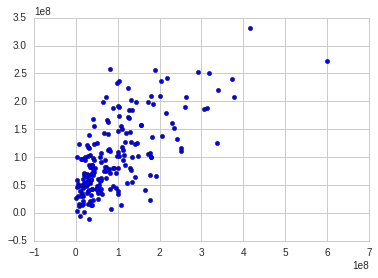

In [439]:
plt.scatter(y_test,predictions)

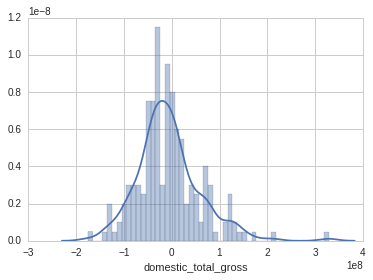

In [440]:
sns.distplot((y_test - predictions), bins = 50)

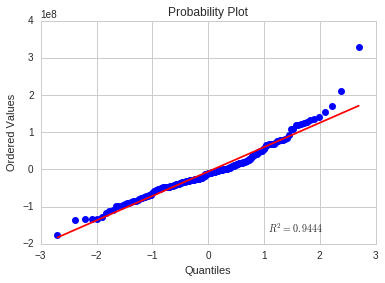

In [441]:
# Trying QQ-plots
import scipy.stats as stats
stats.probplot(y_test - predictions, dist="norm", plot=plt);

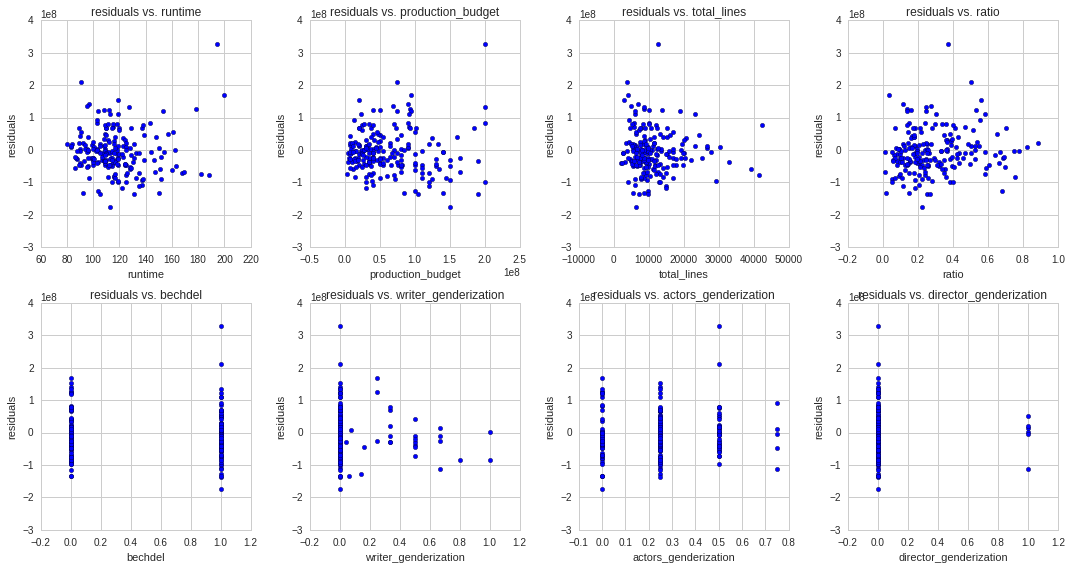

In [442]:
# Plotting residuals against the x_test values (for non-dummy variables)
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15,8))

axes = axes.flatten()

try:
    for i, column in enumerate(list(X_test.columns)):
        axes[i].scatter(list(X_test[column]), y_test - predictions)
        axes[i].set_title('residuals vs. %s' %column)
        axes[i].set_ylabel('residuals')
        axes[i].set_xlabel(column)
except:
    pass

plt.tight_layout(); 

# Decision Tree Visualization

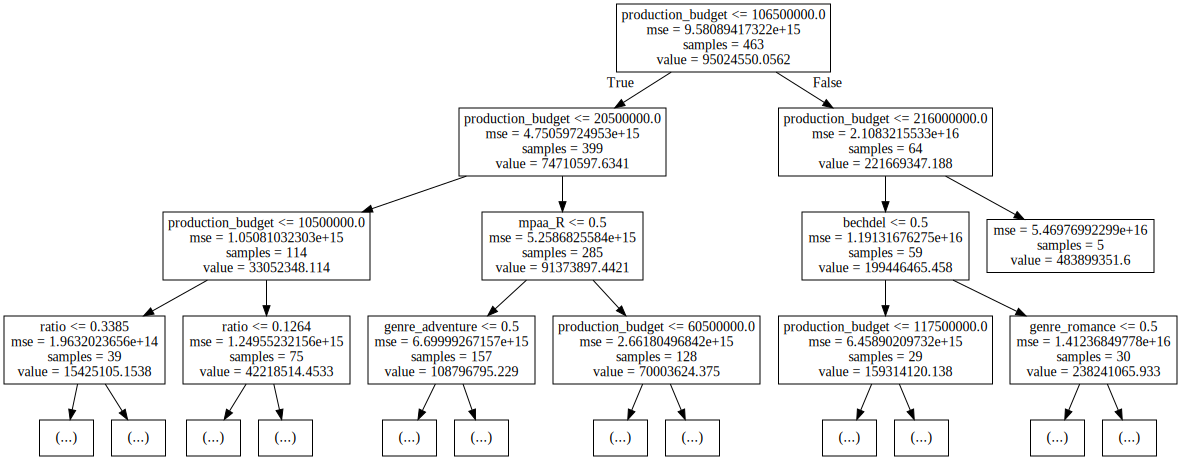

In [443]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(models['decisiontree'], feature_names = X_train.columns,out_file="mytree.dot", max_depth=3)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [460]:
# Trying trees
tree_features = pd.DataFrame(data = models['decisiontree'].feature_importances_, index = X_test.columns, columns = ['feature_importance'])
tree_features[tree_features['feature_importance']>0].sort_values('feature_importance', ascending = False)

forest_features = pd.DataFrame(data = models['randomForest'].feature_importances_, index = X_test.columns, columns = ['feature_importance'])
forest_features[forest_features['feature_importance']>0].sort_values('feature_importance', ascending = False)

adaboost_features = pd.DataFrame(data = models['adaboostedTrees'].feature_importances_, index = X_test.columns, columns = ['feature_importance'])
adaboost_features[adaboost_features['feature_importance']>0].sort_values('feature_importance', ascending = False)

In [457]:
# .37 R Squared
extratree_features = pd.DataFrame(data = models['extratrees'].feature_importances_, index = X_test.columns, columns = ['feature_importance'])
extratree_features[extratree_features['feature_importance']>0].sort_values('feature_importance', ascending = False)

feature_importance
genre_adventure                 0.298110
production_budget               0.248645
genre_fantasy                   0.161439
mpaa_R                          0.109872
bechdel                         0.087468
genre_animation                 0.027400
mpaa_PG                         0.025695
genre_comedy                    0.013400
writer_genderization            0.013372
runtime                         0.013232
genre_crime                     0.001367

In [458]:
# .33 R Squared
gradboost_features = pd.DataFrame(data = models['gradboostedTrees'].feature_importances_, index = X_test.columns, columns = ['feature_importance'])
gradboost_features[gradboost_features['feature_importance']>0].sort_values('feature_importance', ascending = False)

feature_importance
production_budget                 0.202400
total_lines                       0.177602
runtime                           0.160245
ratio                             0.140480
genre_adventure                   0.057104
actors_genderization              0.033413
genre_animation                   0.031182
writer_genderization              0.027931
mpaa_R                            0.020447
director_genderization            0.017447
bechdel                           0.016896
genre_fantasy                     0.016864
genre_drama                       0.014697
genre_action                      0.011677
genre_romance                     0.010580
mpaa_PG-13                        0.010372
genre_family                      0.010085
mpaa_PG                           0.007931
genre_comedy                      0.007013
genre_crime                       0.006218
genre_sci-fi                      0.005147
genre_biography                   0.004252
genre_mystery                     0.003126
genre_history                     0.003052
genre_horror                      0.002472
genre_thriller                    0.001368

## Correlation Plots

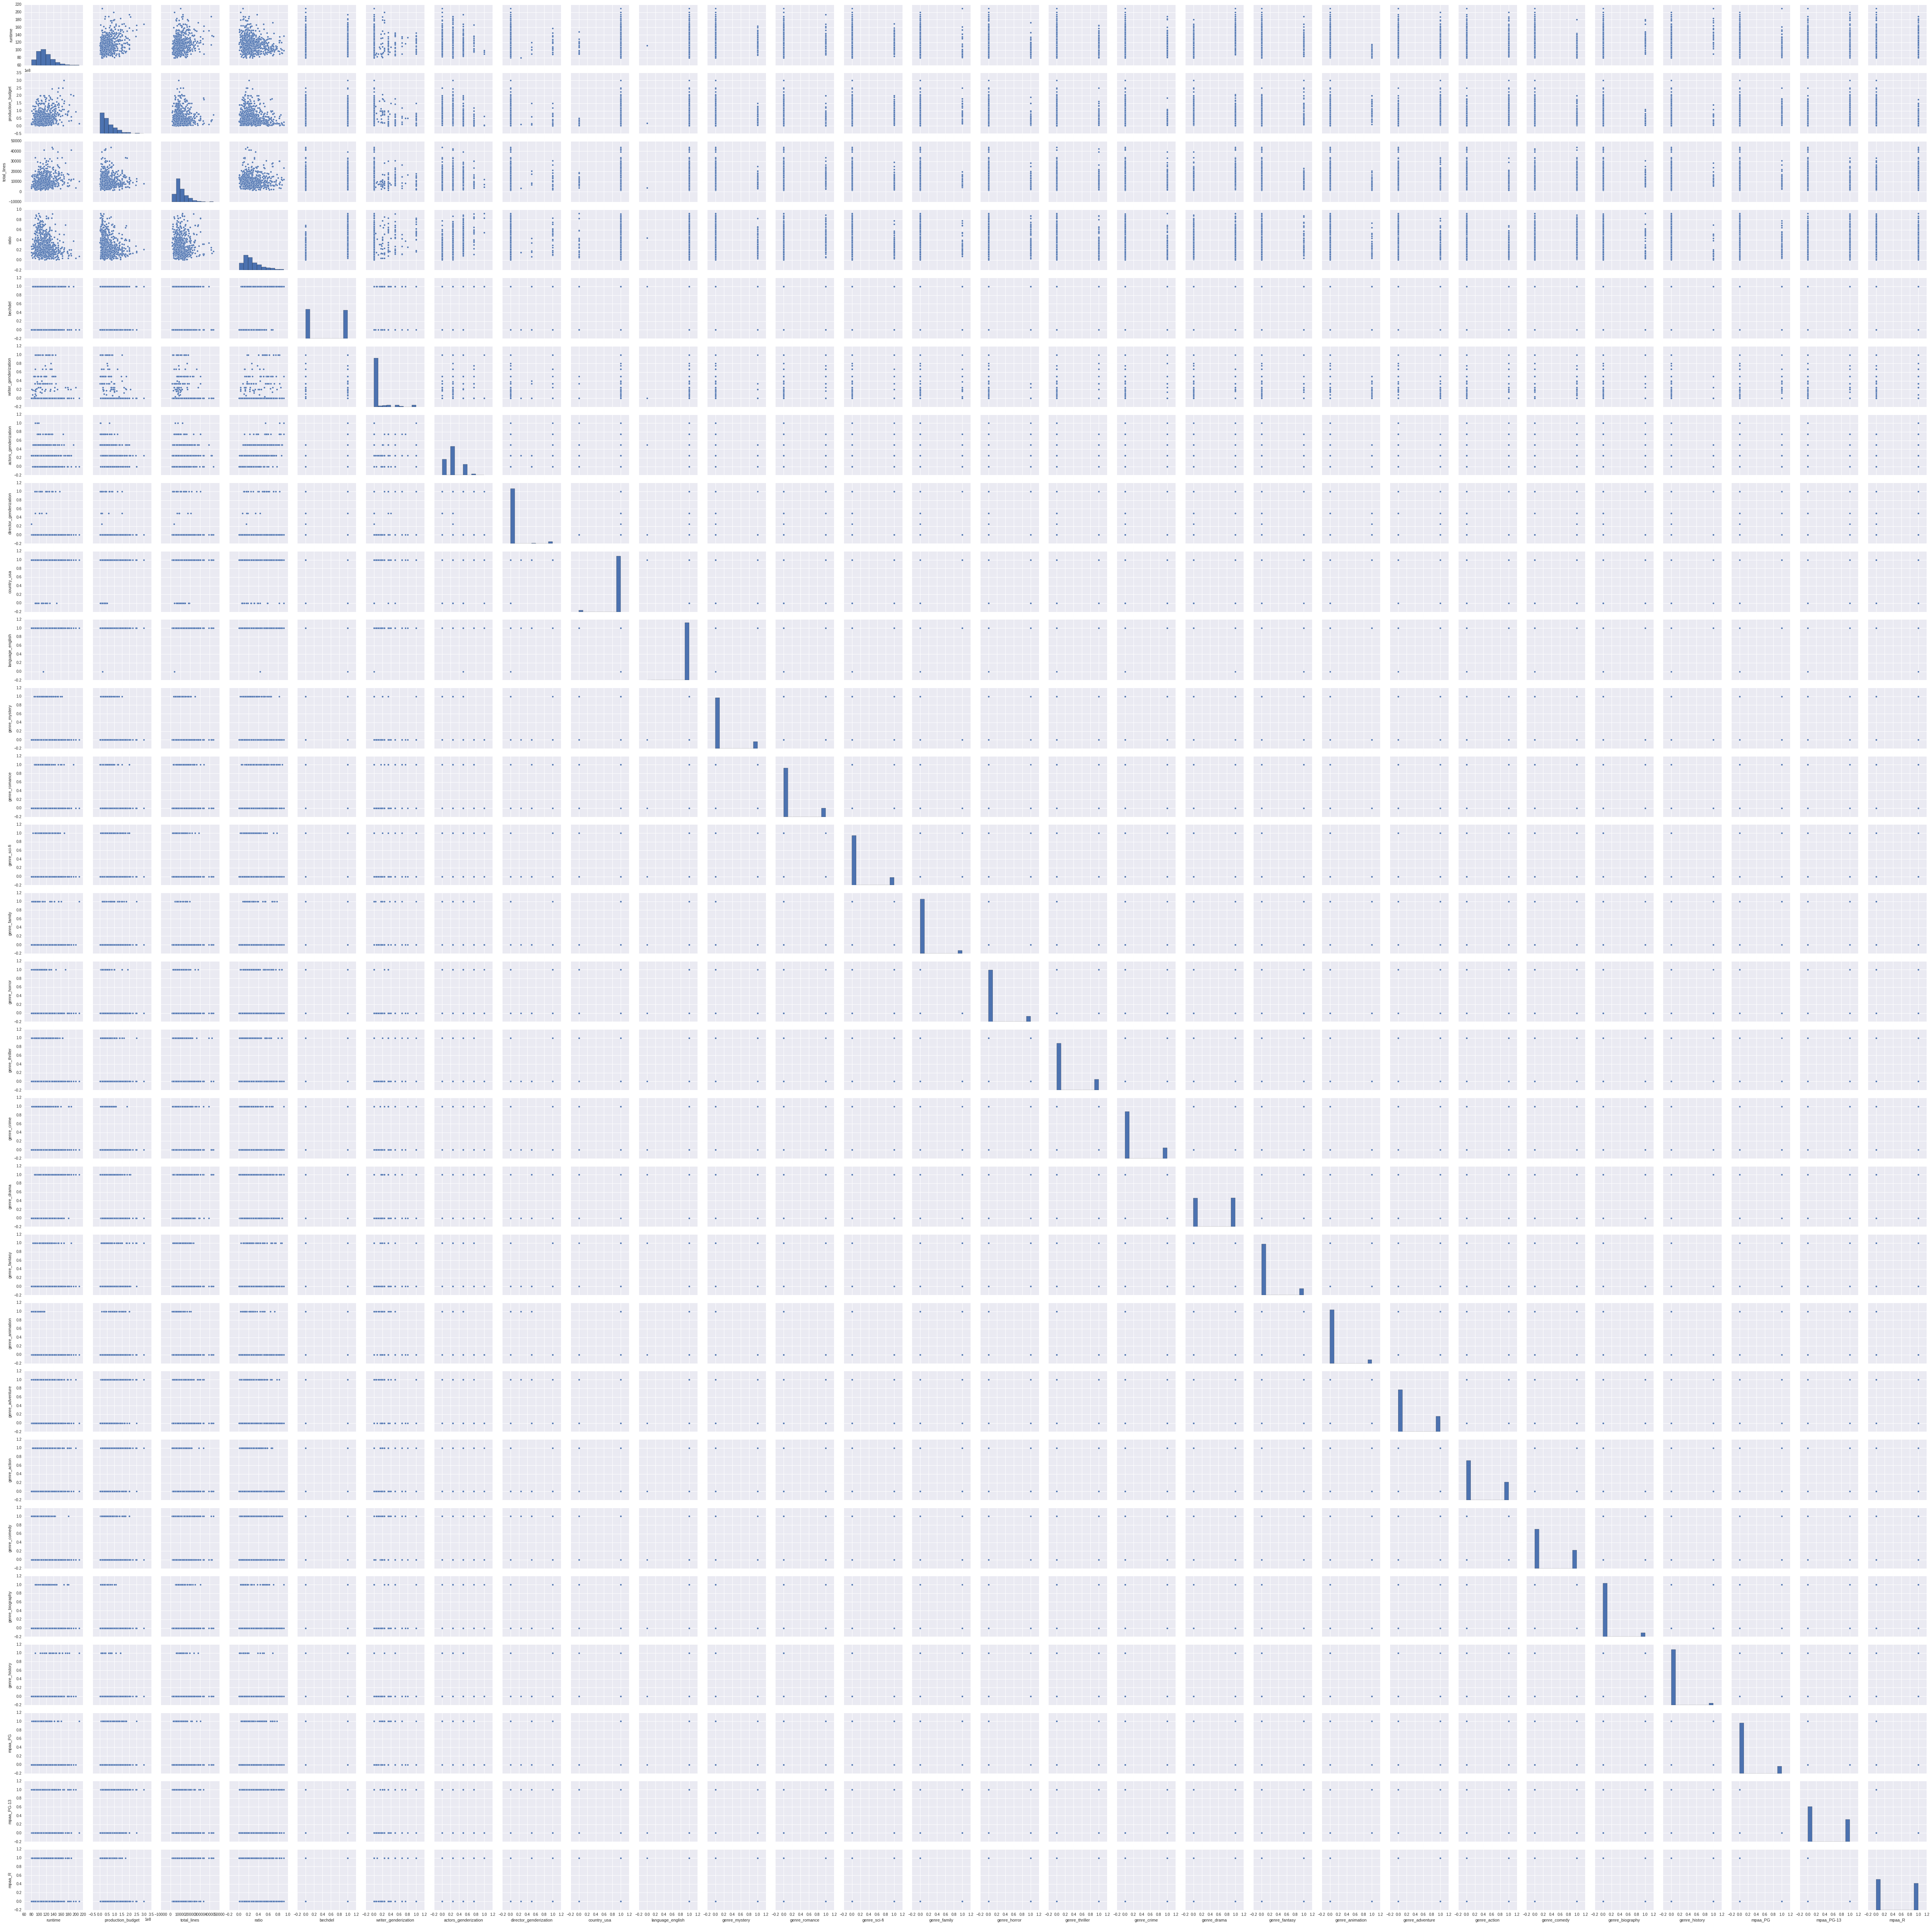

In [28]:
# sns.pairplot(movies.drop(movie_future + genre_list_drop + mpaa_list_drop, axis=1))

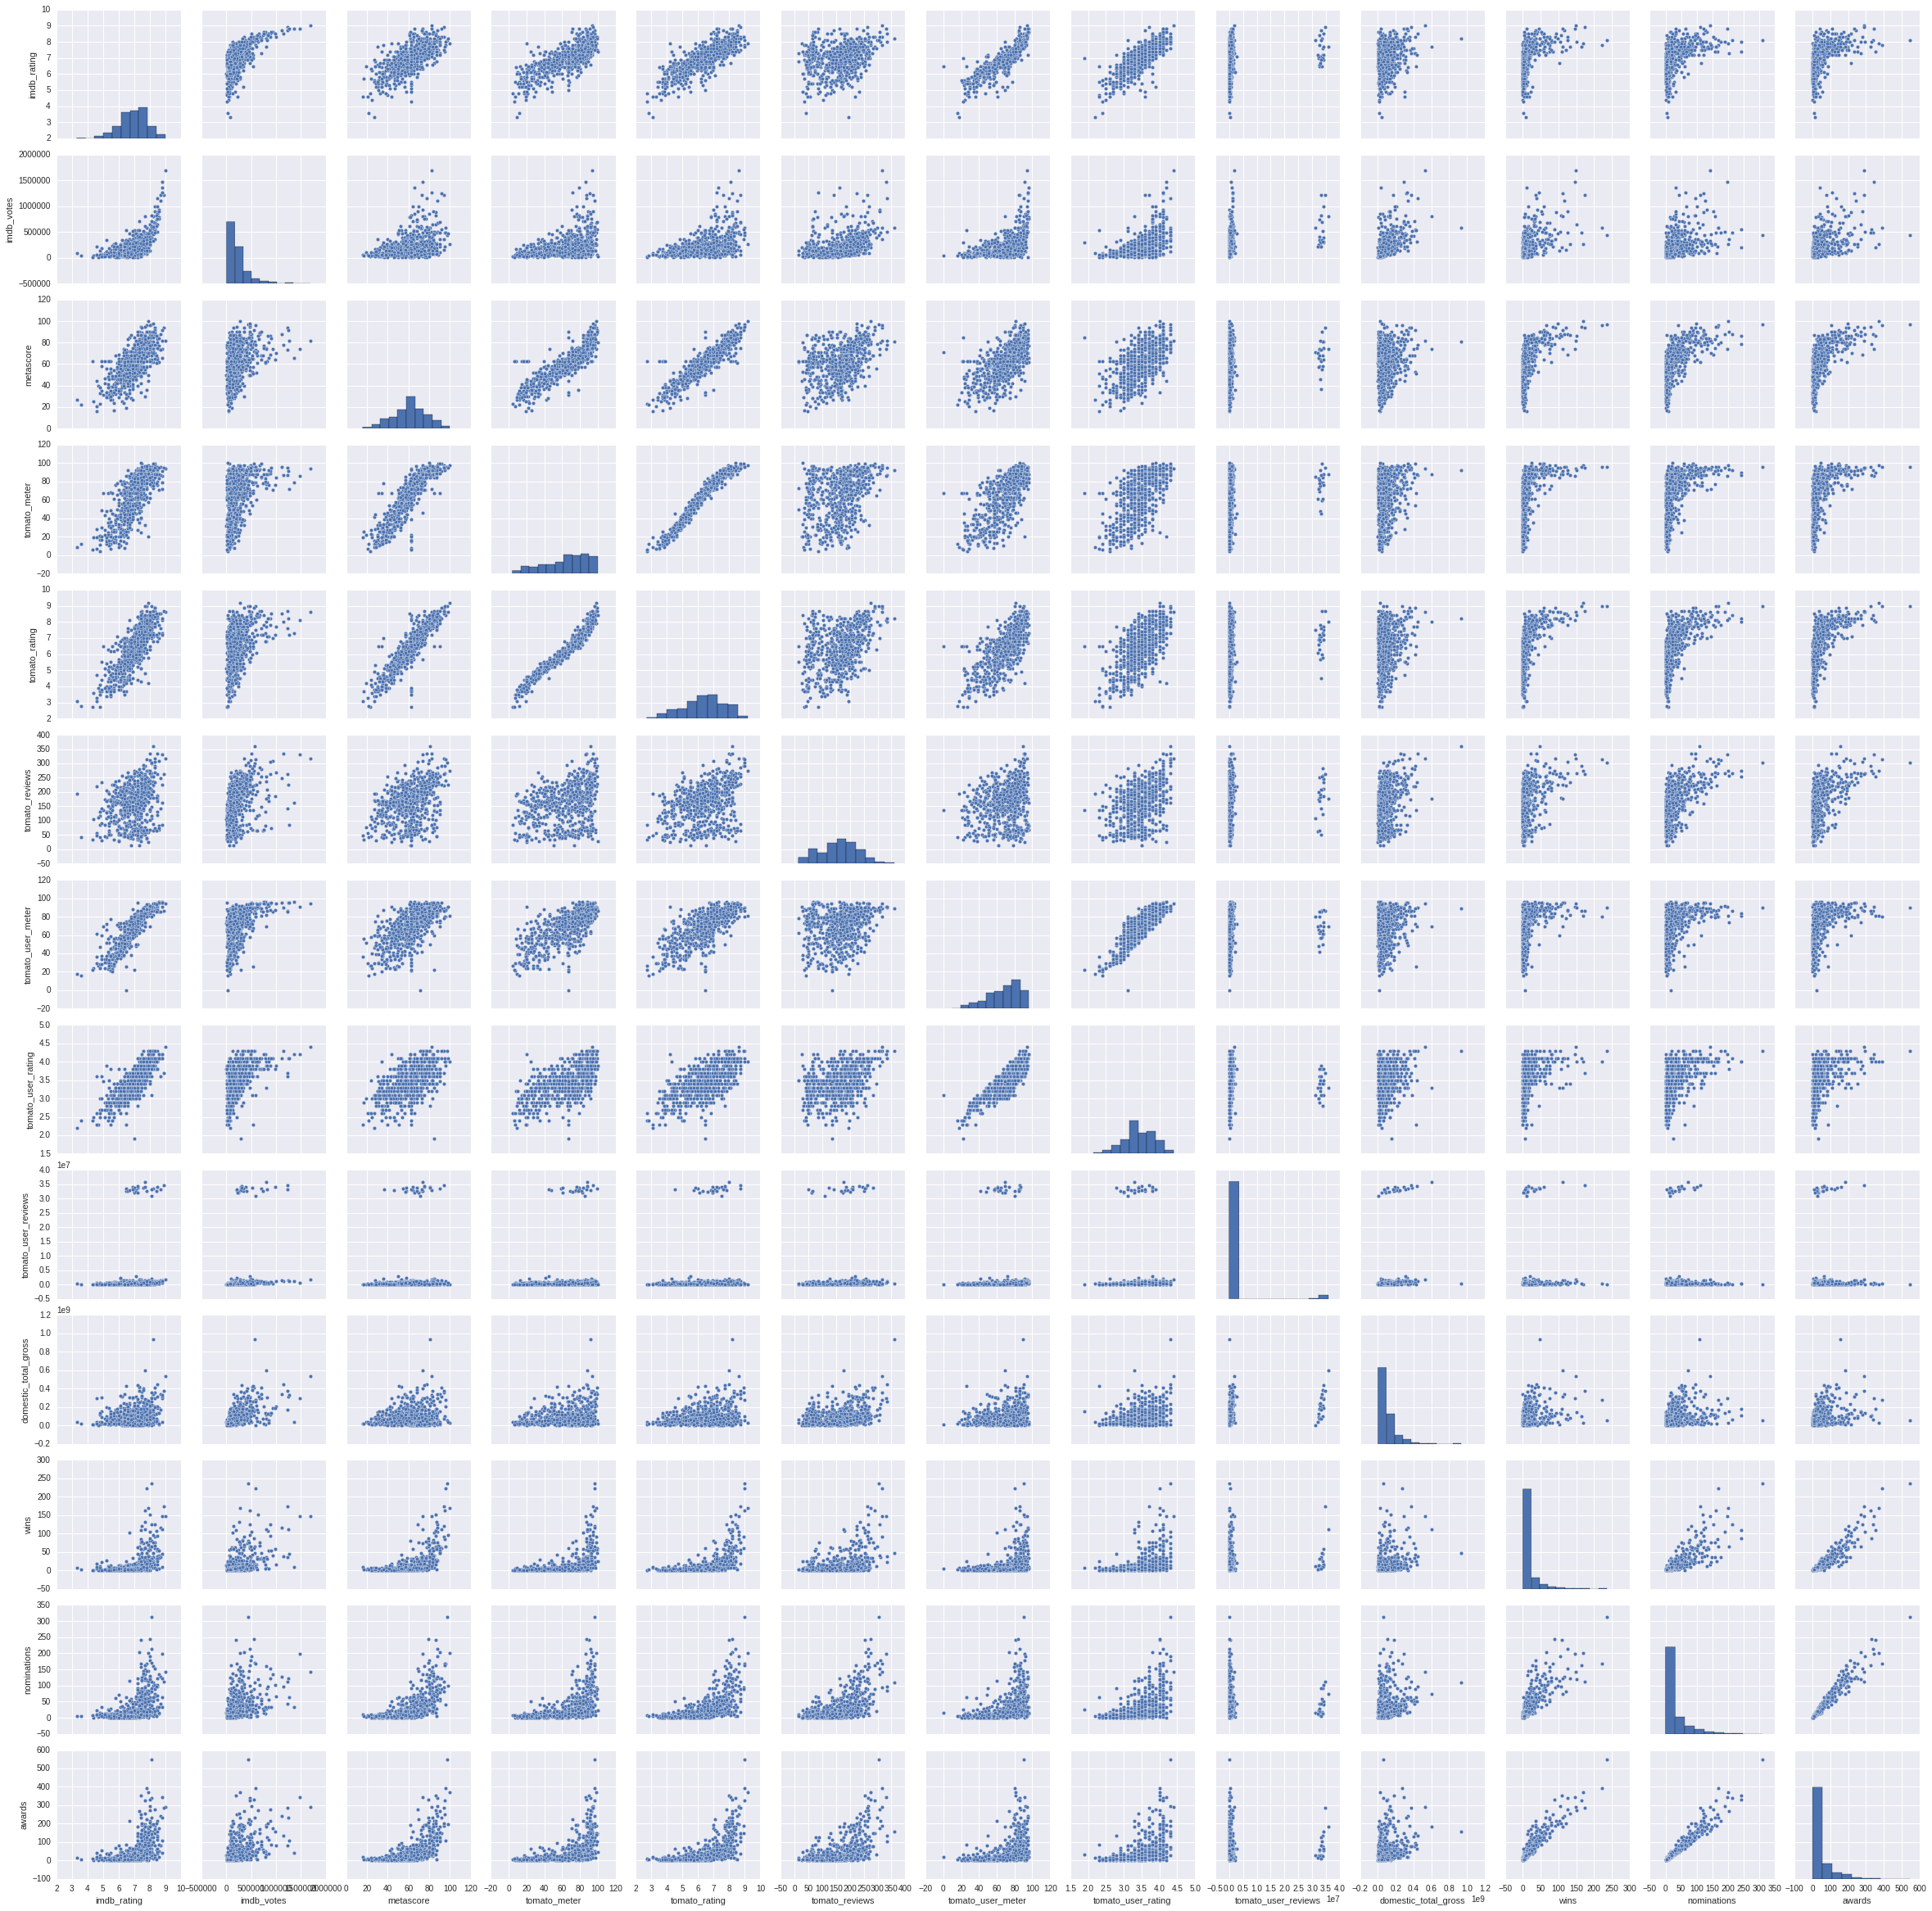

In [29]:
sns.pairplot(movies.loc[:,movie_future])

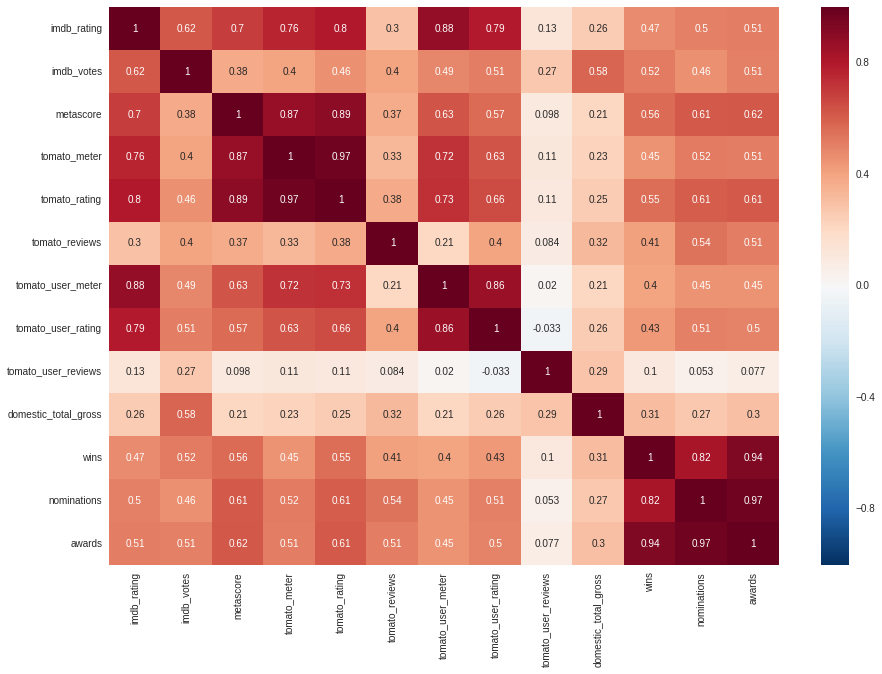

In [113]:
plt.figure(figsize=(15,10))
sns.heatmap(movies.loc[:,movie_future].corr(), annot = True)

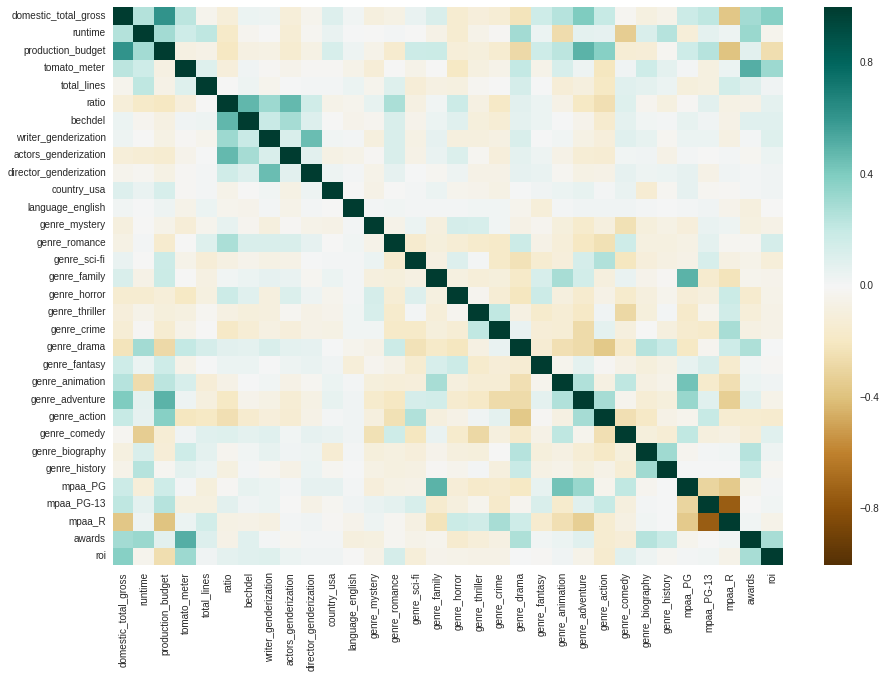

In [92]:
plt.figure(figsize=(15,10))
sns.heatmap(movies.drop(movie_future_drop + genre_list_drop + mpaa_list_drop, axis=1).corr(), cmap = 'BrBG')
plt.savefig('corrmap.png', dpi = 300, bbox_inches = 'tight');

# Looking at Polynomials and Interactions

In [228]:
X,y = movies.drop(movie_future + genre_list_drop + mpaa_list_drop + foreign_drop, axis=1),movies['domestic_total_gross']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [229]:
l1 = linear_model.Lasso(max_iter=2500)
l2 = linear_model.Ridge(max_iter=2500)

grid_params = {'alpha':np.logspace(-4,-.1,30)}
#  grid_params = {'normalize':(True,False), 'alpha':np.logspace(-4,-.1,30)}

grid_l1 = grid_search.GridSearchCV(l1, param_grid= grid_params)
grid_l1.fit(X_train, y_train)

grid_l2 = grid_search.GridSearchCV(l2, param_grid= grid_params)
grid_l2.fit(X_train, y_train)

l1_best = grid_l1.best_estimator_
l2_best = grid_l2.best_estimator_
               
print('lasso:', l1_best.score(X_test,y_test))
print('ridge:', l2_best.score(X_test,y_test))

lasso: 0.448308121072
ridge: 0.450637902481


In [230]:
scaled_X = StandardScaler().fit_transform(X)
poly = PolynomialFeatures(2, interaction_only=True)
poly.fit(scaled_X)
poly.powers_ # this gives labels to the returned arrow indicating the transformation (aka ftr1**2, ftr1*ftr2 etc...)

poly_x = poly.transform(scaled_X)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(poly_x, y, test_size = 0.3)

l1_best.fit(X_train,y_train)
l2_best.fit(X_train,y_train)

print('lasso:', l1_best.score(X_test,y_test))
print('ridge:', l2_best.score(X_test,y_test))

target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X.columns,p) for p in poly.powers_]]

output_df = pd.DataFrame(poly_x, columns = target_feature_names)

lasso: -6.30679408723
ridge: -1.43339300918


In [231]:
sorted(zip(output_df.columns, l1_best.coef_), key = lambda tup: np.abs(tup[1]), reverse=True)

[(u'genre_animation^1xgenre_biography^1', 118609330.37308806),
 (u'genre_mystery^1xgenre_animation^1', 101736827.87148742),
 (u'director_genderization^1xgenre_family^1', 93260988.146450311),
 (u'genre_mystery^1xgenre_history^1', -76102521.080071554),
 (u'genre_animation^1xgenre_action^1', -63630392.662581913),
 (u'genre_family^1xmpaa_R^1', -61882412.35517817),
 (u'production_budget^1', 50627570.391312532),
 (u'genre_family^1xgenre_crime^1', -45286277.176958963),
 (u'bechdel^1xmpaa_PG-13^1', 44575538.278433181),
 (u'genre_animation^1xgenre_comedy^1', -42279787.709690854),
 (u'genre_family^1xgenre_adventure^1', -41372693.145669021),
 (u'bechdel^1xmpaa_R^1', 40831950.330888726),
 (u'genre_romance^1xgenre_animation^1', 40768079.406069212),
 (u'genre_family^1xmpaa_PG-13^1', 39686076.152848735),
 (u'genre_sci-fi^1xgenre_family^1', -35608310.640184447),
 (u'genre_family^1xgenre_comedy^1', 34496071.262150504),
 (u'genre_romance^1xgenre_sci-fi^1', 32833154.703218382),
 (u'genre_comedy^1', -3132

In [232]:
top_ftrs = sorted(zip(output_df.columns, l1_best.coef_),key = lambda tup: np.abs(tup[1]), reverse=True)[:10]

In [233]:
top_ftrs

[(u'genre_animation^1xgenre_biography^1', 118609330.37308806),
 (u'genre_mystery^1xgenre_animation^1', 101736827.87148742),
 (u'director_genderization^1xgenre_family^1', 93260988.146450311),
 (u'genre_mystery^1xgenre_history^1', -76102521.080071554),
 (u'genre_animation^1xgenre_action^1', -63630392.662581913),
 (u'genre_family^1xmpaa_R^1', -61882412.35517817),
 (u'production_budget^1', 50627570.391312532),
 (u'genre_family^1xgenre_crime^1', -45286277.176958963),
 (u'bechdel^1xmpaa_PG-13^1', 44575538.278433181),
 (u'genre_animation^1xgenre_comedy^1', -42279787.709690854)]

In [138]:
combined_features = pipeline.FeatureUnion([('poly3',preprocessing.PolynomialFeatures(degree=3,)),
                                          ('pca', decomposition.PCA(n_components=2))])

steps = [('features', combined_features),
         ('feature_selection', feature_selection.SelectFromModel(linear_model.Lasso(alpha=.1))),
         ('model',linear_model.LinearRegression())]

reg = pipeline.Pipeline(steps)

reg.fit(X_train,y_train)

reg.score(X_test,y_test)

-2253.0936151909441

In [139]:
# Conclusion - too much overfitting - meaningless results

# Visualizations

In [26]:
# Edit - dropping future (except target columns), small genre and small mpaa columns
# looking at key columns
movies_edit = movies.drop(movie_future_drop + genre_list_drop + mpaa_list_drop, axis=1)
movies_edit_subset = movies_edit.loc[:, ['domestic_total_gross', 'tomato_meter', 'awards', 'ratio', 'bechdel']]

# filtering out outliers
# looking at key columns
movies_poor = movies[(movies['domestic_total_gross'] < 250000000) & (movies['awards'] < 200)]
movies_poor_subset = movies_poor.loc[:, ['domestic_total_gross', 'tomato_meter', 'awards', 'ratio', 'bechdel']]

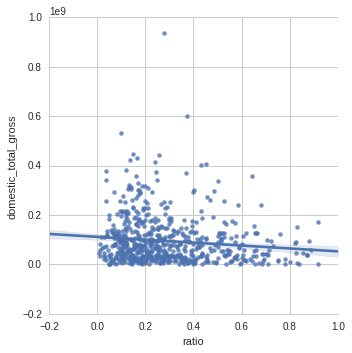

In [182]:
sns.lmplot(x = 'ratio', y = 'domestic_total_gross', data = movies_edit)

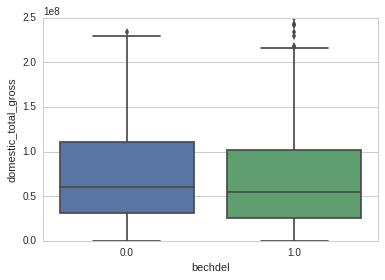

In [240]:
sns.boxplot(x = 'bechdel', y = 'domestic_total_gross', data = movies_poor_subset)

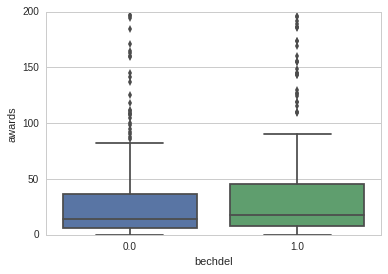

In [241]:
sns.boxplot(x = 'bechdel', y = 'awards', data = movies_poor_subset)

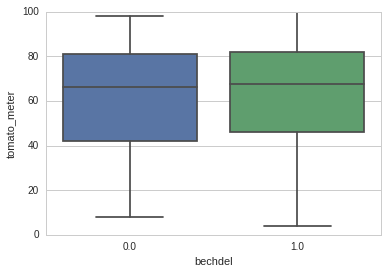

In [242]:
sns.boxplot(x = 'bechdel', y = 'tomato_meter', data = movies_poor_subset)

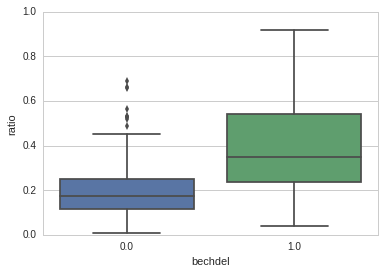

In [243]:
sns.boxplot(x = 'bechdel',  y = 'ratio', data = movies_poor_subset)

In [52]:
# story - in our dataset, about 50% of movies pass the bechdel test, which is great!
# here are some famous movies that don't pass the bechdel test.

print(movies.bechdel.mean())
movies_edit[movies_edit['bechdel'] == 1].sort_values(by='domestic_total_gross', ascending = False)

0.490936555891


domestic_total_gross  \
title                                              imdb_id                           
Star Wars: The Force Awakens                       tt2488496           936662225.0   
Titanic                                            tt0120338           600788188.0   
The Dark Knight                                    tt0468569           533345358.0   
Shrek 2                                            tt0298148           441226247.0   
Star Wars: Episode I - The Phantom Menace          tt0120915           431088295.0   
Toy Story 3                                        tt0435761           415004880.0   
The Hunger Games                                   tt1392170           408010692.0   
Frozen                                             tt2294629           400738009.0   
Despicable Me 2                                    tt1690953           368061265.0   
Jurassic Park                                      tt0107290           357067947.0   
Inside Out                                         tt2096673           356461711.0   
Minions                                            tt2293640           336045770.0   
Shrek the Third                                    tt0413267           322719944.0   
Harry Potter and the Sorcerer's Stone              tt0241527           317575550.0   
Pirates of the Caribbean: At World's End           tt0449088           309420425.0   
Independence Day                                   tt0116629           306169268.0   
Pirates of the Caribbean: The Curse of the Blac... tt0325980           305413918.0   
Star Wars: Episode II - Attack of the Clones       tt0121765           302191252.0   
Harry Potter and the Half-Blood Prince             tt0417741           301959197.0   
The Twilight Saga: Eclipse                         tt1325004           300531751.0   
The Twilight Saga: New Moon                        tt1259571           296623634.0   
The Sixth Sense                                    tt0167404           293506292.0   
Inception                                          tt1375666           292576195.0   
The Chronicles of Narnia: The Lion, the Witch a... tt0363771           291710957.0   
The Matrix Reloaded                                tt0234215           281576461.0   
Harry Potter and the Chamber of Secrets            tt0295297           261988482.0   
The Incredibles                                    tt0317705           261441092.0   
Star Trek                                          tt0796366           257730019.0   
I Am Legend                                        tt0480249           256393010.0   
Despicable Me                                      tt1323594           251513985.0   
...                                                                            ...   
People Like Us                                     tt1716777            12434778.0   
The Young Victoria                                 tt0962736            11001272.0   
Drop Dead Gorgeous                                 tt0157503            10571408.0   
Whiteout                                           tt0365929            10275638.0   
Away We Go                                         tt1176740             9451946.0   
Strange Days                                       tt0114558             7959291.0   
Serial Mom                                         tt0111127             7820688.0   
Slither                                            tt0439815             7802450.0   
The Green Inferno                                  tt2403021             7192291.0   
Me and Earl and the Dying Girl                     tt2582496             6758416.0   
The Last Station                                   tt0824758             6617867.0   
The Rules of Attraction                            tt0292644             6532619.0   
Winter's Bone                                      tt1399683             6531503.0   
Ghost World                                        tt0162346             6217849.0   
Ed Wood             

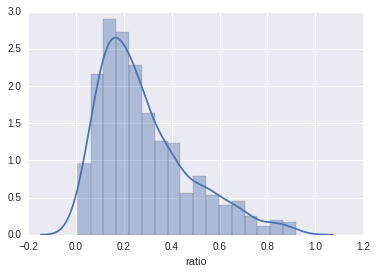

In [53]:
# unfortunately, the ratio of female to male dialogue tells a different story as, on average, women have only 
# about 28% of total lines of dialogue across the dataset
sns.distplot(movies['ratio'])

In [54]:
movies['ratio'].describe()

count    662.000000
mean       0.283497
std        0.189418
min        0.007170
25%        0.142429
50%        0.238754
75%        0.383008
max        0.919368
Name: ratio, dtype: float64

In [55]:
# actors, writers, and directors tell a sad story

# on average, only 25% of the lead actors billed in the dataset are female
movies['actors_genderization'].describe()

count    662.000000
mean       0.245091
std        0.195627
min        0.000000
25%        0.000000
50%        0.250000
75%        0.250000
max        1.000000
Name: actors_genderization, dtype: float64

In [56]:
# on average, only 7.5% of the writers in the dataset are female
movies['writer_genderization'].describe()

count    662.000000
mean       0.074328
std        0.207947
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: writer_genderization, dtype: float64

In [57]:
# on average, only 4% of the directors in the dataset are female
movies['director_genderization'].describe()

count    662.000000
mean       0.040408
std        0.191465
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: director_genderization, dtype: float64

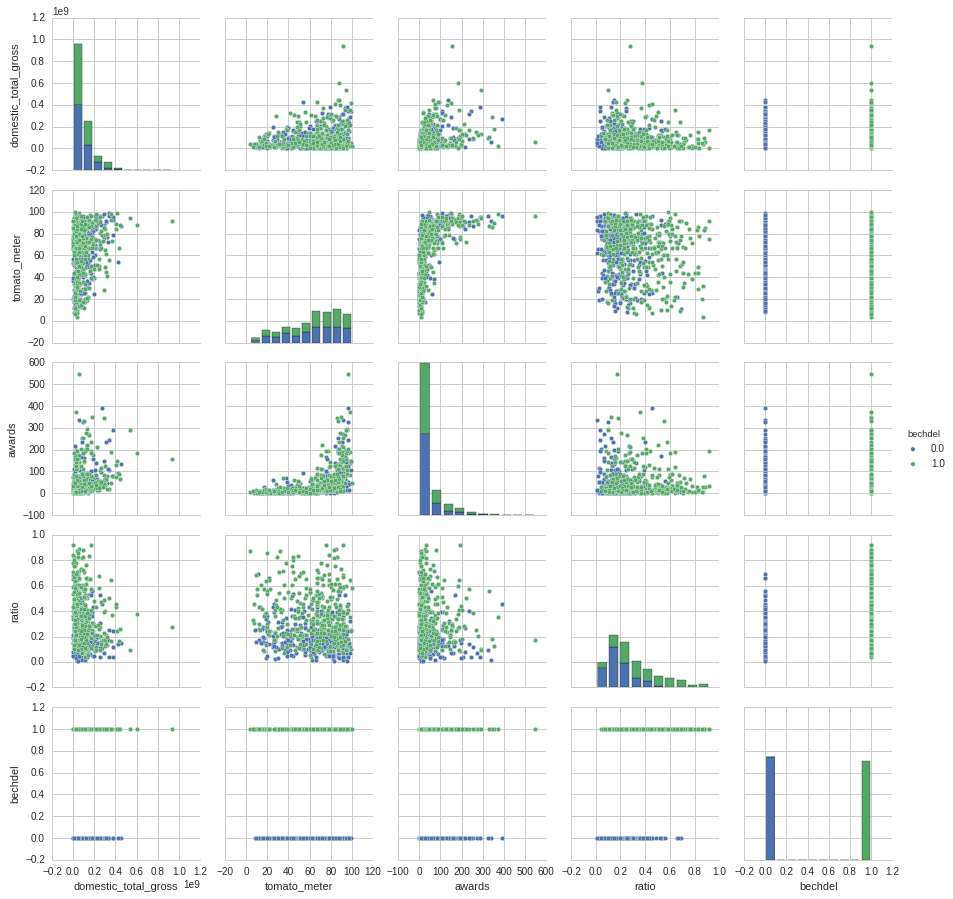

In [237]:
sns.pairplot(movies_edit_subset, hue = 'bechdel')

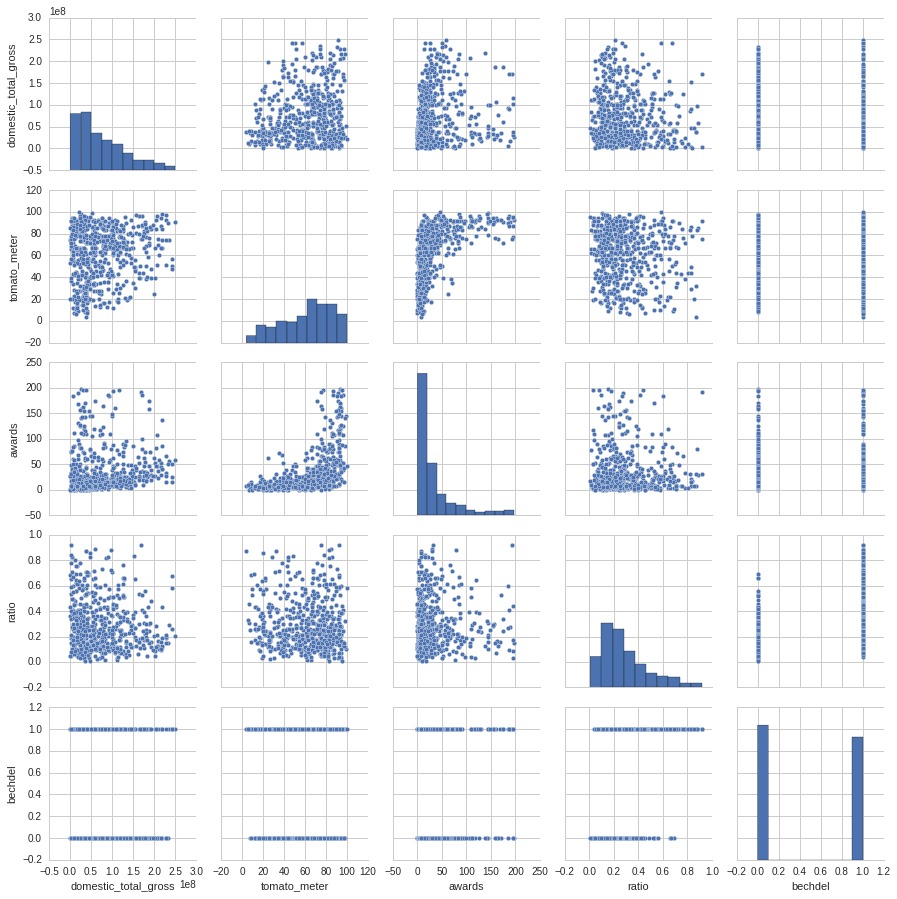

In [238]:
sns.pairplot(movies_subset)

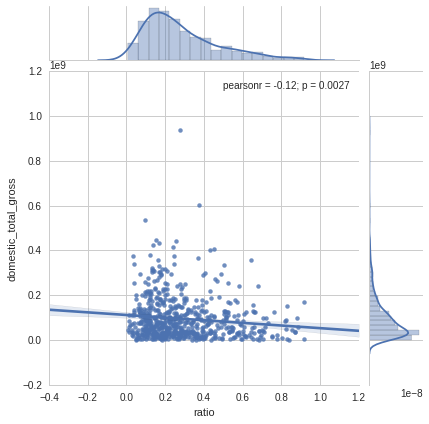

In [245]:
sns.jointplot(x = 'ratio', y = 'domestic_total_gross', data = movies_edit_subset, kind = 'reg')
# movies_edit_subset['ratio2'] = movies_edit_subset['ratio'].apply(lambda x: x ** 2)
# sns.jointplot(x = 'ratio2', y = 'domestic_total_gross', data = movies_edit_subset, kind = 'reg')

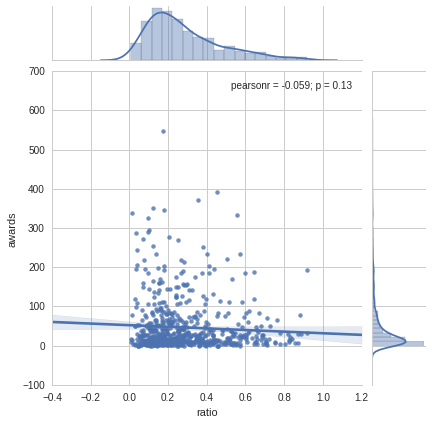

In [252]:
sns.jointplot(x = 'ratio', y = 'awards', data = movies_edit_subset, kind = 'reg')

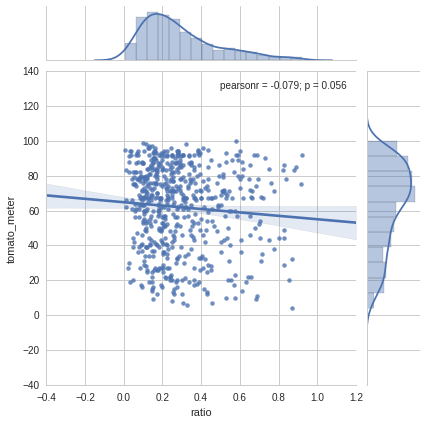

In [251]:
sns.jointplot(x = 'ratio', y = 'tomato_meter', data = movies_edit_subset, kind = 'reg')

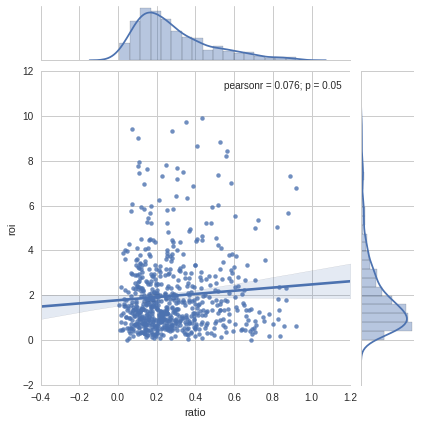

In [396]:
sns.jointplot(x = 'ratio', y = 'roi', data = movies, kind = 'reg')

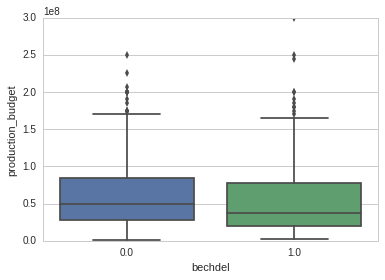

In [405]:
sns.boxplot(x = 'bechdel', y = 'production_budget', data = movies)

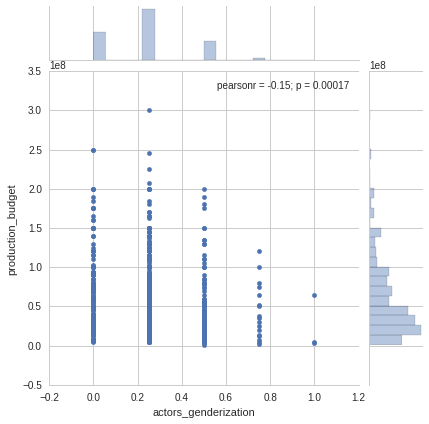

In [409]:
sns.jointplot(x = 'actors_genderization', y = 'production_budget', data = movies)

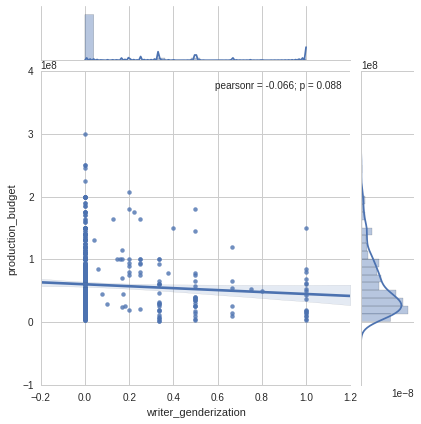

In [421]:
sns.jointplot(x = 'writer_genderization', y = 'production_budget', data = movies, kind = 'reg')

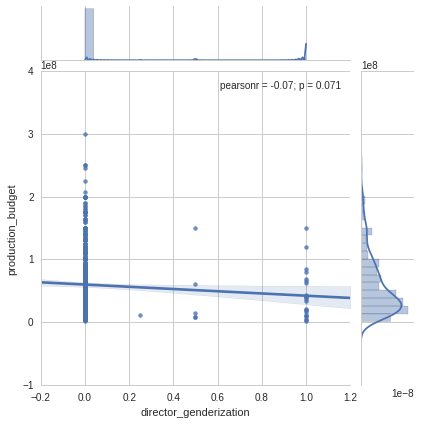

In [420]:
sns.jointplot(x = 'director_genderization', y = 'production_budget', data = movies, kind = 'reg')

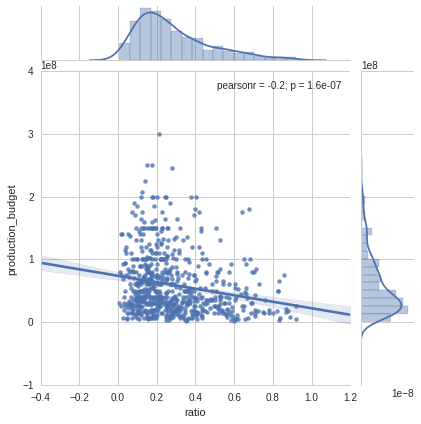

In [415]:
sns.jointplot(x = 'ratio', y = 'production_budget', data = movies, kind = 'reg')

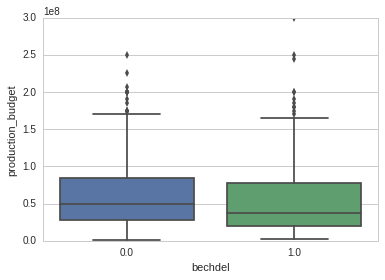

In [461]:
sns.boxplot(x = 'bechdel', y = 'production_budget', data = movies)

In [465]:
movies.group_by('bechdel', )

domestic_total_gross  runtime  \
title                        imdb_id                                    
Star Wars: The Force Awakens tt2488496           936662225.0    136.0   
Inside Out                   tt2096673           356461711.0     94.0   
Minions                      tt2293640           336045770.0     91.0   
The Martian                  tt3659388           228433663.0    141.0   
Straight Outta Compton       tt1398426           161197785.0    147.0   

                                        production_budget  imdb_rating  \
title                        imdb_id                                     
Star Wars: The Force Awakens tt2488496        245000000.0          8.2   
Inside Out                   tt2096673        175000000.0          8.3   
Minions                      tt2293640         74000000.0          6.4   
The Martian                  tt3659388        108000000.0          8.0   
Straight Outta Compton       tt1398426         28000000.0          7.9   

                                        imdb_votes  metascore  tomato_meter  \
title                        imdb_id                                          
Star Wars: The Force Awakens tt2488496      575439       81.0          92.0   
Inside Out                   tt2096673      352037       94.0          98.0   
Minions                      tt2293640      144106       56.0          56.0   
The Martian                  tt3659388      483695       80.0          92.0   
Straight Outta Compton       tt1398426      122209       72.0          87.0   

                                        tomato_rating  tomato_reviews  \
title                        imdb_id                                    
Star Wars: The Force Awakens tt2488496            8.2           360.0   
Inside Out                   tt2096673            8.9           317.0   
Minions                      tt2293640            5.8           196.0   
The Martian                  tt3659388            7.8           311.0   
Straight Outta Compton       tt1398426            7.3           210.0   

                                        tomato_user_meter    ...     \
title                        imdb_id                         ...      
Star Wars: The Force Awakens tt2488496               89.0    ...      
Inside Out                   tt2096673               89.0    ...      
Minions                      tt2293640               49.0    ...      
The Martian                  tt3659388               91.0    ...      
Straight Outta Compton       tt1398426               92.0    ...      

                                        genre_biography  genre_history  \
title                        imdb_id                                     
Star Wars: The Force Awakens tt2488496                0              0   
Inside Out                   tt2096673                0              0   
Minions                      tt2293640                0              0   
The Martian                  tt3659388                0              0   
Straight Outta Compton       tt1398426                1              0   

                                        mpaa_G  mpaa_NC-17  mpaa_PG  \
title                        imdb_id                                  
Star Wars: The Force Awakens tt2488496     0.0         0.0      0.0   
Inside Out                   tt2096673     0.0         0.0      1.0   
Minions                      tt2293640     0.0         0.0      1.0   
The Martian                  tt3659388     0.0         0.0      0.0   
Straight Outta Compton       tt1398426     0.0         0.0      0.0   

                                        mpaa_PG-13  mpaa_R  mpaa_Unrated  \
title                        imdb_id                                       
Star Wars: The Force Awakens tt2488496         1.0     0.0           0.0   
Inside Out                   tt2096673         0.0     0.0           0.0   
Minions                      tt2293640         0.0     0.0           0.0   
The Martian                  tt3659388         1

In [64]:
agents = movies.loc[:,['actors_genderization', 'writer_genderization', 'director_genderization']].apply(np.mean)

In [65]:
agents.index

Index([u'actors_genderization', u'writer_genderization',
       u'director_genderization'],
      dtype='object')

In [66]:
agents.values

array([ 0.24509063,  0.07432788,  0.04040785])

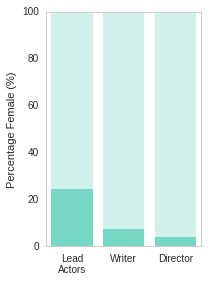

In [93]:
fig = plt.figure(dpi=600, figsize=(3,4))
axes = fig.add_subplot(111)

y = [100, 100, 100]
x = [1, 2, 3]
axes.bar(x, y, align='center', color = '#D1F2EB', edgecolor='none')

y = np.array(agents.values * 100)
x = [1, 2, 3]
axes.bar(x, y, align='center', color = '#76D7C4', edgecolor='none')

axes.set_ylabel('Percentage Female (%)')
axes.set_xticks(x)
axes.set_xticklabels(['Lead\nActors', 'Writer', 'Director']);
fig.tight_layout()
# axes.set_title('Proportion of Female Roles for Films Released Between 1980 and 2016');
plt.savefig('proportion.png', dpi = 300, bbox_inches = 'tight');

## Scratchwork for Presentation

In [26]:
# covariance matrix - plotted
# isolate genres - bechdel emerging as predictor
# Polynomials and interactions - inconclusive

In [540]:
movies.columns

Index([  u'domestic_total_gross',                u'runtime',
            u'production_budget',            u'imdb_rating',
                   u'imdb_votes',              u'metascore',
                 u'tomato_meter',          u'tomato_rating',
               u'tomato_reviews',      u'tomato_user_meter',
           u'tomato_user_rating',    u'tomato_user_reviews',
                  u'total_lines',                  u'ratio',
                      u'bechdel',                   u'wins',
                  u'nominations',   u'writer_genderization',
         u'actors_genderization', u'director_genderization',
                  u'country_usa',       u'language_english',
                u'genre_mystery',          u'genre_romance',
                  u'genre_sport',           u'genre_sci-fi',
                 u'genre_family',           u'genre_horror',
               u'genre_thriller',            u'genre_crime',
                  u'genre_drama',          u'genre_fantasy',
                    u'ge

In [59]:
sm_model = sm.OLS(y_train,X_train)
results = sm_model.fit()

In [115]:
test = movies.loc[:,['domestic_total_gross', 'production_budget', 'roi', 'bechdel']].reset_index()

In [119]:
test.groupby(by = 'bechdel').mean()

domestic_total_gross  production_budget       roi
bechdel                                                   
0.0              9.093914e+07       6.274481e+07  1.818417
1.0              9.902486e+07       5.526769e+07  2.136211

In [120]:
movies.corr()

domestic_total_gross   runtime  production_budget  \
domestic_total_gross                1.000000  0.251658           0.616075   
runtime                             0.251658  1.000000           0.300173   
production_budget                   0.616075  0.300173           1.000000   
imdb_rating                         0.256559  0.331986          -0.020770   
imdb_votes                          0.580576  0.373746           0.332998   
metascore                           0.211189  0.211263          -0.056721   
tomato_meter                        0.229753  0.167964          -0.075997   
tomato_rating                       0.253976  0.224589          -0.039060   
tomato_reviews                      0.324331  0.178915           0.348819   
tomato_user_meter                   0.214641  0.276517          -0.081398   
tomato_user_rating                  0.256307  0.218493          -0.006903   
tomato_user_reviews                 0.288247  0.125120           0.150819   
total_lines                        -0.032184  0.219938          -0.054859   
ratio                              -0.116405 -0.177935          -0.201926   
bechdel                             0.042330 -0.024862          -0.077072   
wins                                0.308479  0.289447           0.059665   
nominations                         0.273244  0.321239           0.087907   
writer_genderization                0.033464 -0.007414          -0.066412   
actors_genderization               -0.114308 -0.126086          -0.145672   
director_genderization             -0.038488 -0.015928          -0.070122   
country_usa                         0.108658  0.052715           0.127608   
language_english                    0.023329  0.007778           0.032139   
genre_mystery                      -0.087417 -0.000654          -0.053889   
genre_romance                      -0.066163  0.015047          -0.152156   
genre_sport                        -0.021271  0.029355          -0.077681   
genre_sci-fi                        0.051279 -0.001028           0.178037   
genre_family                        0.124742 -0.057924           0.186430   
genre_horror                       -0.142115 -0.142458          -0.114385   
genre_thriller                     -0.107536 -0.050141          -0.094662   
genre_crime                        -0.127818 -0.010014          -0.143074   
genre_drama                        -0.220917  0.303080          -0.273877   
genre_fantasy                       0.164454  0.039942           0.170562   
genre_war                          -0.046337  0.070006          -0.046918   
genre_animation                     0.247770 -0.263307           0.233166   
genre_music                        -0.072266 -0.030450          -0.058106   
genre_adventure                     0.400700  0.077789           0.495377   
genre_action                        0.200141  0.067932           0.381659   
genre_western                       0.027449 -0.020311           0.050993   
genre_comedy                       -0.019395 -0.343020          -0.132548   
genre_musical                      -0.053888  0.002775           0.001666   
genre_biography                    -0.080943  0.122341          -0.121804   
genre_history                      -0.052071  0.242463          -0.016617   
mpaa_G                              0.174601 -0.126989           0.127234   
mpaa_NC-17                         -0.030369 -0.035949          -0.011287   
mpaa_PG                             0.172867 -0.114155           0.170745   
mpaa_PG-13                          0.222210  0.074116           0.248750   
mpaa_R                             -0.371394  0.038138          -0.384130   
mpaa_Unrated                       -0.030118  0.001613          -0.044970   
awards                              0.300808  0.322360           0.079863   
roi                                 0.378244 -0.037897          -0.255368   

                        imdb_rating  imdb_votes  metascore  tomato_meter  \
domestic_total_gross

In [122]:
movies.drop(movie_future_drop + genre_list_drop + mpaa_list_drop, axis=1).corr()

domestic_total_gross   runtime  production_budget  \
domestic_total_gross                1.000000  0.251658           0.616075   
runtime                             0.251658  1.000000           0.300173   
production_budget                   0.616075  0.300173           1.000000   
tomato_meter                        0.229753  0.167964          -0.075997   
total_lines                        -0.032184  0.219938          -0.054859   
ratio                              -0.116405 -0.177935          -0.201926   
bechdel                             0.042330 -0.024862          -0.077072   
writer_genderization                0.033464 -0.007414          -0.066412   
actors_genderization               -0.114308 -0.126086          -0.145672   
director_genderization             -0.038488 -0.015928          -0.070122   
country_usa                         0.108658  0.052715           0.127608   
language_english                    0.023329  0.007778           0.032139   
genre_mystery                      -0.087417 -0.000654          -0.053889   
genre_romance                      -0.066163  0.015047          -0.152156   
genre_sci-fi                        0.051279 -0.001028           0.178037   
genre_family                        0.124742 -0.057924           0.186430   
genre_horror                       -0.142115 -0.142458          -0.114385   
genre_thriller                     -0.107536 -0.050141          -0.094662   
genre_crime                        -0.127818 -0.010014          -0.143074   
genre_drama                        -0.220917  0.303080          -0.273877   
genre_fantasy                       0.164454  0.039942           0.170562   
genre_animation                     0.247770 -0.263307           0.233166   
genre_adventure                     0.400700  0.077789           0.495377   
genre_action                        0.200141  0.067932           0.381659   
genre_comedy                       -0.019395 -0.343020          -0.132548   
genre_biography                    -0.080943  0.122341          -0.121804   
genre_history                      -0.052071  0.242463          -0.016617   
mpaa_PG                             0.172867 -0.114155           0.170745   
mpaa_PG-13                          0.222210  0.074116           0.248750   
mpaa_R                             -0.371394  0.038138          -0.384130   
awards                              0.300808  0.322360           0.079863   
roi                                 0.378244 -0.037897          -0.255368   

                        tomato_meter  total_lines     ratio   bechdel  \
domestic_total_gross        0.229753    -0.032184 -0.116405  0.042330   
runtime                     0.167964     0.219938 -0.177935 -0.024862   
production_budget          -0.075997    -0.054859 -0.201926 -0.077072   
tomato_meter                1.000000     0.099399 -0.104916  0.026425   
total_lines                 0.099399     1.000000 -0.003839  0.031258   
ratio                      -0.104916    -0.003839  1.000000  0.483725   
bechdel                     0.026425     0.031258  0.483725  1.000000   
writer_genderization       -0.008537    -0.036935  0.318981  0.193544   
actors_genderization       -0.041595     0.006837  0.473566  0.291307   
director_genderization     -0.012444     0.014712  0.163345  0.108462   
country_usa                -0.008808     0.013007 -0.048145 -0.003031   
language_english           -0.049956     0.043598 -0.031465 -0.039607   
genre_mystery              -0.117949    -0.038330  0.062196 -0.026410   
genre_romance              -0.002485     0.099060  0.276966  0.117340   
genre_sci-fi               -0.049154    -0.121244 -0.072269 -0.041027   
genre_family               -0.004855    -0.074898  0.016555  0.044322   
genre_horror               -0.189838    -0.080423  0.174404  0.092295   
genre_thriller             -0.083675    -0.015944 -0.072951 -0.096218   
genre_crime                -0.054685    -0.000377 -0.186198 -0.131663   
genre_drama           